# prophetという時系列解析ツールを触ってみた

In [1]:
import pandas as pd

# peytonというアメフト選手のwikipedia記事のページビュー数
df = pd.read_csv("https://raw.githubusercontent.com/facebookincubator/prophet/master/examples/example_wp_peyton_manning.csv")
# prophetは欠損値を除外してもちゃんと予測してくれる
df = df.drop(10)
# len(df)
df.tail()

,ds,y
2900,2016-01-16,2483
2901,2016-01-17,10656
2902,2016-01-18,30754
2903,2016-01-19,9190
2904,2016-01-20,7269


In [2]:
# yの増加が大きそうなので対数スケールする
import numpy as np
df['y'] = np.log(df['y'])
df.tail()

,ds,y
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871
2904,2016-01-20,8.891374


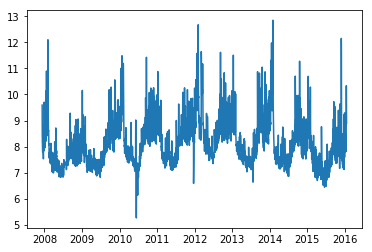

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(pd.to_datetime(df['ds']), df['y'])
plt.show()

In [4]:
from fbprophet import Prophet
# デイリーのデータなのでその旨を指定
m = Prophet(daily_seasonality=True)
m.fit(df)

In [5]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3264,2017-01-15
3265,2017-01-16
3266,2017-01-17
3267,2017-01-18
3268,2017-01-19


In [6]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3264,2017-01-15,8.207540,7.506722,8.888624
3265,2017-01-16,8.532651,7.860783,9.270124
3266,2017-01-17,8.320098,7.577752,9.064800
3267,2017-01-18,8.152772,7.445946,8.865903
3268,2017-01-19,8.165932,7.377201,8.901163


In [7]:
forecast

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,daily,daily_lower,daily_upper,seasonal,...,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2007-12-10,9.271058,9.271058,9.271058,8.232134,9.461765,-1.218246,-1.218246,-1.218246,-0.413754,...,-0.413754,-0.413754,-0.413754,0.352157,0.352157,0.352157,0.452335,0.452335,0.452335,8.857305
1,2007-12-11,9.269457,9.269457,9.269457,8.017807,9.243613,-1.218246,-1.218246,-1.218246,-0.663589,...,-0.663589,-0.663589,-0.663589,0.119469,0.119469,0.119469,0.435187,0.435187,0.435187,8.605867
2,2007-12-12,9.267855,9.267855,9.267855,7.794008,9.040390,-1.218246,-1.218246,-1.218246,-0.866134,...,-0.866134,-0.866134,-0.866134,-0.066853,-0.066853,-0.066853,0.418965,0.418965,0.418965,8.401721
3,2007-12-13,9.266253,9.266253,9.266253,7.778121,8.953913,-1.218246,-1.218246,-1.218246,-0.885439,...,-0.885439,-0.885439,-0.885439,-0.071302,-0.071302,-0.071302,0.404109,0.404109,0.404109,8.380814
4,2007-12-14,9.264652,9.264652,9.264652,7.742485,9.042805,-1.218246,-1.218246,-1.218246,-0.896961,...,-0.896961,-0.896961,-0.896961,-0.069739,-0.069739,-0.069739,0.391024,0.391024,0.391024,8.367691
5,2007-12-15,9.263050,9.263050,9.263050,7.471451,8.754220,-1.218246,-1.218246,-1.218246,-1.150025,...,-1.150025,-1.150025,-1.150025,-0.311845,-0.311845,-0.311845,0.380066,0.380066,0.380066,8.113025
6,2007-12-16,9.261448,9.261448,9.261448,7.835166,9.089963,-1.218246,-1.218246,-1.218246,-0.798594,...,-0.798594,-0.798594,-0.798594,0.048113,0.048113,0.048113,0.371539,0.371539,0.371539,8.462854
7,2007-12-17,9.259847,9.259847,9.259847,8.164256,9.382331,-1.218246,-1.218246,-1.218246,-0.500403,...,-0.500403,-0.500403,-0.500403,0.352157,0.352157,0.352157,0.365686,0.365686,0.365686,8.759444
8,2007-12-18,9.258245,9.258245,9.258245,7.871255,9.149111,-1.218246,-1.218246,-1.218246,-0.736087,...,-0.736087,-0.736087,-0.736087,0.119469,0.119469,0.119469,0.362690,0.362690,0.362690,8.522158
9,2007-12-19,9.256643,9.256643,9.256643,7.724644,8.908989,-1.218246,-1.218246,-1.218246,-0.922434,...,-0.922434,-0.922434,-0.922434,-0.066853,-0.066853,-0.066853,0.362665,0.362665,0.362665,8.334210


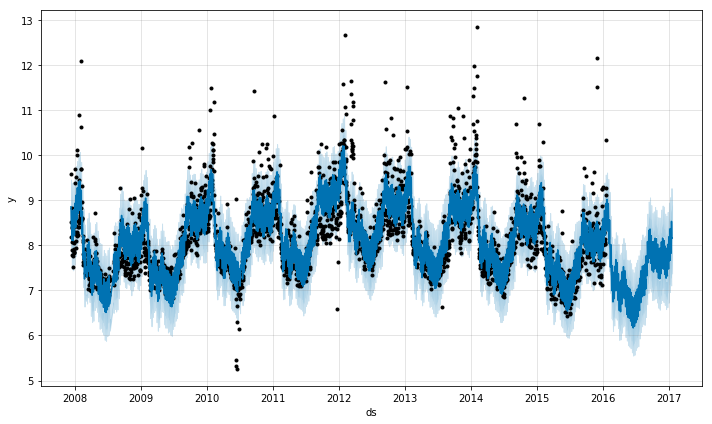

In [8]:
m.plot(forecast);

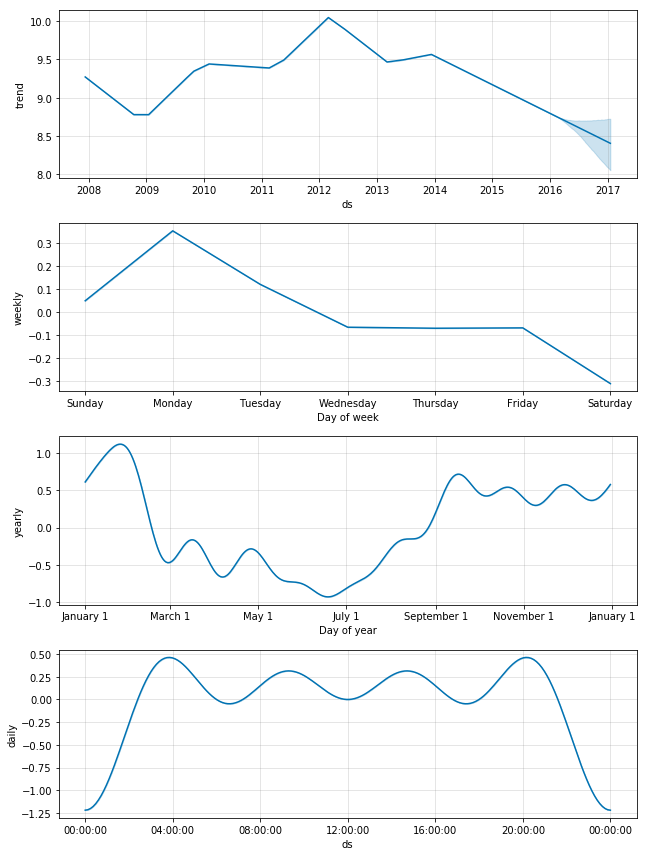

In [9]:
# dailyはフーリエ変換ででてくるパルス関数
m.plot_components(forecast);

In [10]:
import pandas as pd

df = pd.read_csv('./scrapinghub_townhousing.csv')
df.head()

,ds,name,shikikin,reikin
0,2017-10-20,61139,61139,61139
1,2017-10-21,61838,61838,61838
2,2017-10-23,44944,44944,44944
3,2017-10-25,60117,60117,60117
4,2017-10-26,61372,61372,61372


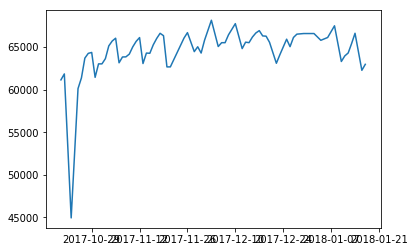

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(pd.to_datetime(df['ds']), df['name'])
plt.show()

In [12]:
df = df.drop(2)
df.head()

,ds,name,shikikin,reikin
0,2017-10-20,61139,61139,61139
1,2017-10-21,61838,61838,61838
3,2017-10-25,60117,60117,60117
4,2017-10-26,61372,61372,61372
5,2017-10-27,63693,63693,63693


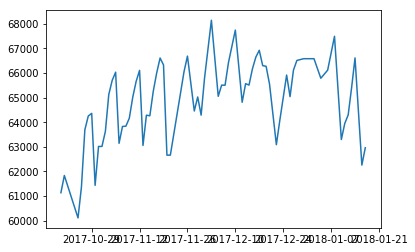

In [13]:
plt.plot(pd.to_datetime(df['ds']), df['name'])
plt.show()

In [14]:
d = {'ds': df['ds'], 'y': df['name']}
df = pd.DataFrame(data=d)
df.head()

,ds,y
0,2017-10-20,61139
1,2017-10-21,61838
3,2017-10-25,60117
4,2017-10-26,61372
5,2017-10-27,63693


In [15]:
from fbprophet import Prophet
# デイリーのデータなのでその旨を指定
m = Prophet(daily_seasonality=True, yearly_seasonality=True, interval_width=0.95)
m.fit(df)

In [16]:
future = m.make_future_dataframe(periods=7)
future.tail()

,ds
72,2018-01-20
73,2018-01-21
74,2018-01-22
75,2018-01-23
76,2018-01-24


In [17]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2017-10-20,61156.561464,59501.405830,62681.632054
1,2017-10-21,61814.233309,60266.869211,63418.497582
2,2017-10-25,61110.976735,59509.700052,62861.729949
3,2017-10-26,61597.732702,59869.405955,63387.893879
4,2017-10-27,62488.660137,60807.558421,64046.697940


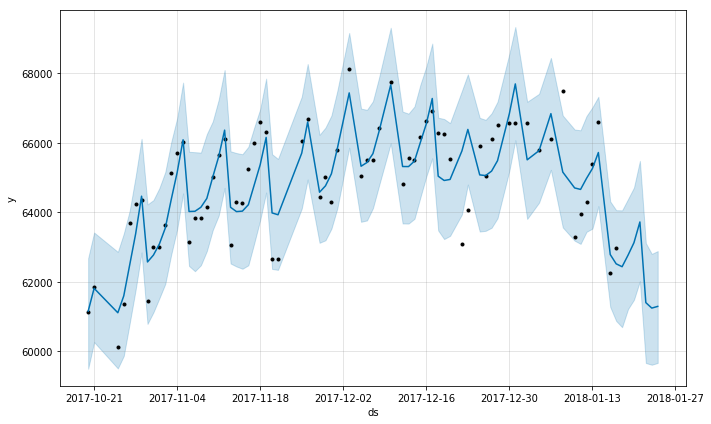

In [18]:
m.plot(forecast);

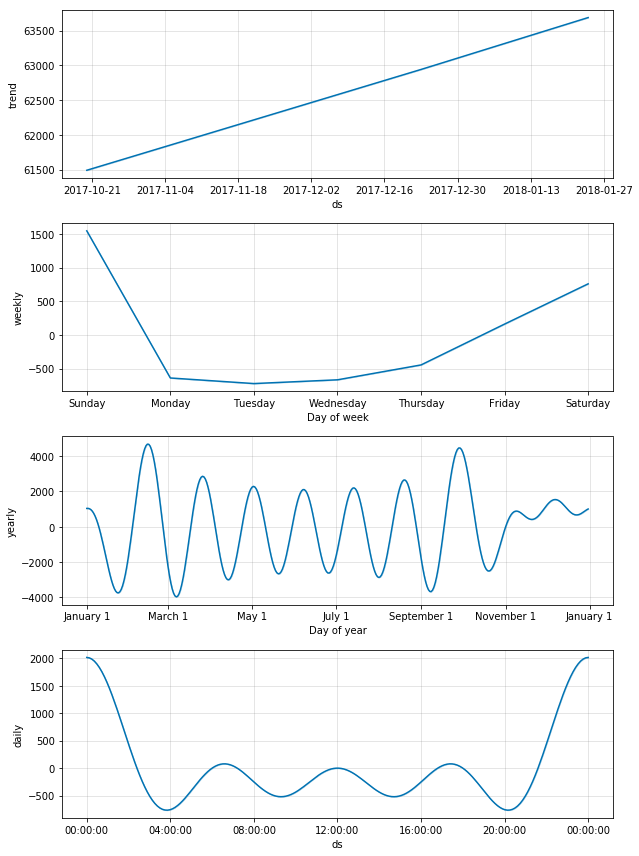

In [19]:
# dailyはフーリエ変換ででてくるパルス関数
m.plot_components(forecast);

In [20]:
# 予測から外れた日のスクレイピング結果を調べる
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
72,2018-01-20,63127.154898,61484.888591,64712.518364
73,2018-01-21,63723.123518,62022.514417,65479.812574
74,2018-01-22,61402.845772,59665.691967,63114.379138
75,2018-01-23,61245.444667,59615.429198,62804.352012
76,2018-01-24,61294.010612,59667.302176,62885.407018


In [21]:
df = pd.read_csv('./scrapinghub_choei.csv')
df.head()

,ds,name,shikikin,reikin
0,2017-11-08,3042,3042,3042
1,2017-11-09,3274,3274,3274
2,2017-11-10,3267,3267,3267
3,2017-11-11,703,703,703
4,2017-11-12,3278,3278,3278


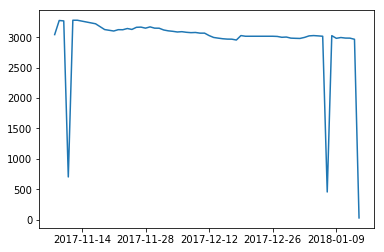

In [22]:
plt.plot(pd.to_datetime(df['ds']), df['name'])
plt.show()

In [23]:
df = df.drop(3)
df = df.drop(55)
df = df.drop(62)

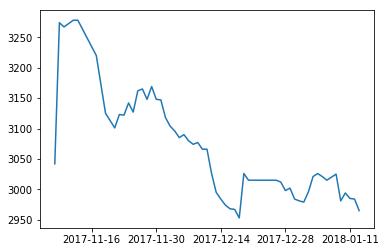

In [24]:
plt.plot(pd.to_datetime(df['ds']), df['name'])
plt.show()

In [25]:
d = {'ds': df['ds'], 'y': df['name']}
df = pd.DataFrame(data=d)
df.head()

,ds,y
0,2017-11-08,3042
1,2017-11-09,3274
2,2017-11-10,3267
4,2017-11-12,3278
5,2017-11-13,3278


In [26]:
# デイリーのデータなのでその旨を指定
m = Prophet(daily_seasonality=True, yearly_seasonality=True, interval_width=0.95)
m.fit(df)

In [27]:
future = m.make_future_dataframe(periods=7)
future.tail()

,ds
62,2018-01-16
63,2018-01-17
64,2018-01-18
65,2018-01-19
66,2018-01-20


In [28]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2017-11-08,3142.379113,3083.584648,3198.703319
1,2017-11-09,3205.473464,3150.893283,3263.661626
2,2017-11-10,3235.665129,3182.828777,3290.009974
3,2017-11-12,3249.173232,3188.857771,3303.627999
4,2017-11-13,3259.940150,3204.739614,3315.513119


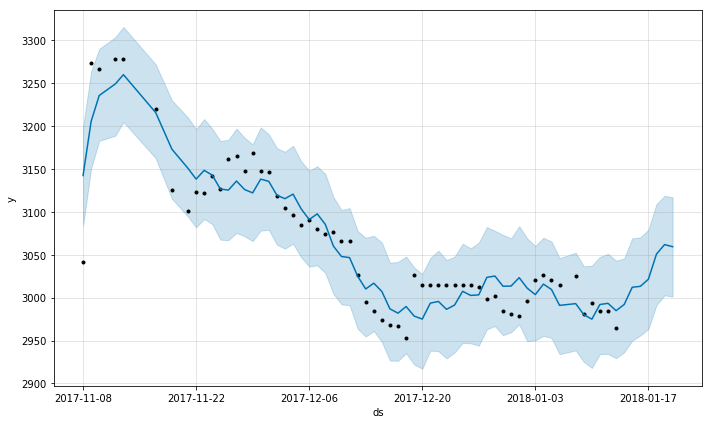

In [29]:
m.plot(forecast);

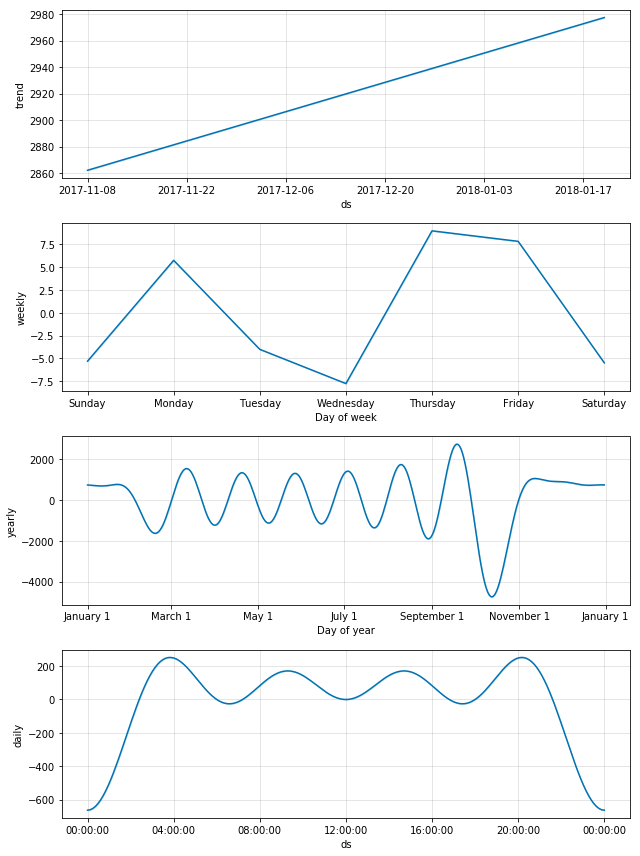

In [30]:
# dailyはフーリエ変換ででてくるパルス関数
m.plot_components(forecast);

In [32]:
## 結論

# - 欠損値の除去を頑張れば予測値から大きく外れてるものだけの通知が自動でできそう
# - スクレイピングの結果が0以外の異常な状態を検知できれば安心にクローラーをほったらかせそう